In [19]:
import random
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI
from IPython.display import Image, display

In [20]:
class State(TypedDict):
  input: str
  action: Literal["reverse", "upper"]
  output: str

In [21]:
workflow = StateGraph(state_schema=State)

In [22]:
def node_a(state: State)->State:
  output = state['input'][::-1]
  print(f"output: {output}")
  
  return {"output": output}

In [23]:
def node_b(state: State):
  output = state['input'].upper()
  print(f"output: {output}")
  
  return {"output": output}

In [24]:
workflow.add_node(node_a)
workflow.add_node(node_b)

In [25]:
def routing_function(state: State):
  action = state['action']
  if action == "reverse":
    return "node_a"
  if action == "upper":
    return "node_b"


In [26]:
workflow.add_conditional_edges(
  source=START,
  path=routing_function,
  path_map=["node_a", "node_b"]
)

In [27]:
workflow.add_edge("node_a", END)
workflow.add_edge("node_b", END)

In [28]:
graph = workflow.compile()

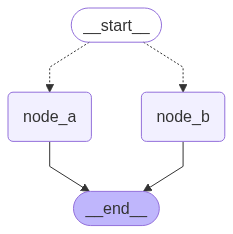

In [29]:
display(
  Image(
    graph.get_graph().draw_mermaid_png()
  )
)

In [30]:
graph.invoke(
  input = {
    "input": "Hello",
    "action": "reverse"
  }
)

output: olleH


{'input': 'Hello', 'action': 'reverse', 'output': 'olleH'}

In [31]:
graph.invoke(
  input = {
    "input": "Hello",
    "action": "upper"
  }
)

output: HELLO


{'input': 'Hello', 'action': 'upper', 'output': 'HELLO'}